<a href="https://colab.research.google.com/github/ankit-thealchemist/tensorflow/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import os
import datetime
#%load_ext tensorboard
#!rm -rf ./logs/fit

In [2]:
print(tf.__version__)
print(tf.keras.__version__)

2.3.0
2.4.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_images,train_labels) , (test_images,test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

7

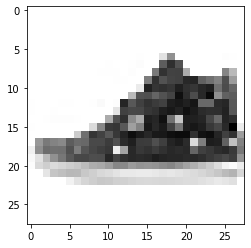

In [9]:
plt.imshow(train_images[221],cmap= plt.cm.binary)
train_labels[221]

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
train_images = train_images.reshape((60000,28,28,1))

In [12]:
test_images = test_images.reshape((10000,28,28,1))

In [13]:
train_images = train_images.astype('float')/255
test_images = test_images.astype('float')/255

In [14]:
#now making the model 
model = keras.Sequential(name = "fashion_mnist")


In [15]:
# adding the layer one by one 
# First convolutional layer. 
# Number of neurons = 32
# filter(kernel) size = 3x3
# Activation function = Relu
# input data (images) size (height, width, channels) = (28, 28, 1)
# Channels is 'colors' here. Since fashion MNIST images are grayscale, number of colors = 1, hence, channels = 1
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),))

In [16]:
model.summary()

Model: "fashion_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
#adding the max pooling layer
model.add(layers.MaxPooling2D((2,2)))
#adding the droppout layer for more accuracy
model.add(layers.Dropout(.5))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))

#adding the max pooling layer
model.add(layers.MaxPooling2D((2,2)))

#adding the droppout layer for more accuracy
model.add(layers.Dropout(.5))

In [18]:
model.summary()

Model: "fashion_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)       

In [19]:
model.summary()

Model: "fashion_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)       

In [20]:
#flatting the layer to connect further
model.add(layers.Flatten())

In [21]:
model.summary()

Model: "fashion_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)       

In [22]:
#Creating the dense layer for further connection 
model.add(layers.Dense(128,activation='relu',
                       #kernel_regularizer=tf.keras.regularizers.l2(l2=0.0001)
                       ))
# Adding the last layer for the classification of the various items adding the softmax activation for the probability distribution 
model.add(layers.Dropout(.5))
model.add(layers.Dense(128,activation='relu',
                       #kernel_regularizer=tf.keras.regularizers.l2(l2=0.0001)
                       ))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "fashion_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)       

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
#%tensorboard --logdir logs/fit

In [24]:
#now training the model by shuffeling and validating the data of 10%

graph = model.fit(train_images,train_labels,epochs=100,batch_size =  512,shuffle = True,validation_split= 0.1)

Epoch 1/100
106/106 [==============================] - 2s 22ms/step - loss: 1.0294 - accuracy: 0.6115 - val_loss: 0.5455 - val_accuracy: 0.7837
Epoch 2/100
106/106 [==============================] - 2s 19ms/step - loss: 0.5890 - accuracy: 0.7730 - val_loss: 0.4567 - val_accuracy: 0.8255
Epoch 3/100
106/106 [==============================] - 2s 19ms/step - loss: 0.5000 - accuracy: 0.8128 - val_loss: 0.3813 - val_accuracy: 0.8543
Epoch 4/100
106/106 [==============================] - 2s 19ms/step - loss: 0.4388 - accuracy: 0.8381 - val_loss: 0.3383 - val_accuracy: 0.8730
Epoch 5/100
106/106 [==============================] - 2s 19ms/step - loss: 0.3945 - accuracy: 0.8570 - val_loss: 0.3025 - val_accuracy: 0.8908
Epoch 6/100
106/106 [==============================] - 2s 19ms/step - loss: 0.3677 - accuracy: 0.8672 - val_loss: 0.2926 - val_accuracy: 0.8870
Epoch 7/100
106/106 [==============================] - 2s 19ms/step - loss: 0.3429 - accuracy: 0.8763 - val_loss: 0.2790 - val_accuracy:

In [28]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1928 - accuracy: 0.9388


In [26]:
print(graph.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


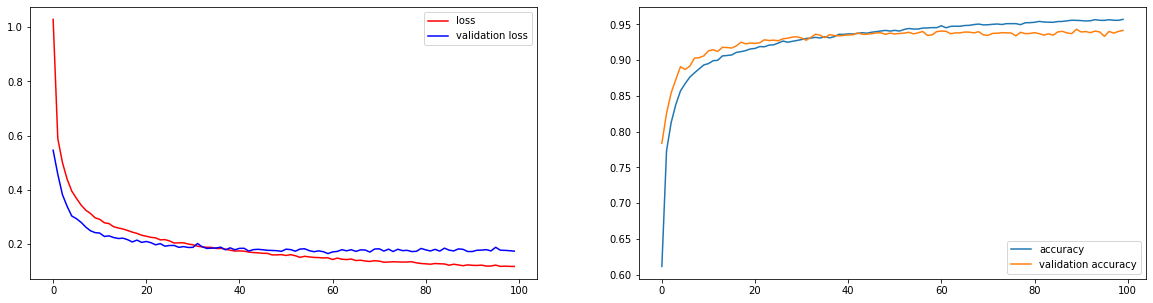

In [27]:
fig, axes = plt.subplots(1,2,figsize=(20,5))
axes[0].plot(graph.history['loss'],color = 'red',label="loss")
axes[0].plot(graph.history['val_loss'],color ='blue',label="validation loss")
axes[1].plot(graph.history['accuracy'],label= "accuracy")
axes[1].plot(graph.history['val_accuracy'],label="validation accuracy")
axes[0].legend()
axes[1].legend()
fig.show()